<a href="https://colab.research.google.com/github/NMashalov/Ru-manim-tutorial/blob/main/manim_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output
!sudo apt update  > /dev/null
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev \
    texlive-lang-cyrillic  > /dev/null

!pip install manim
!pip install IPython --upgrade
clear_output()

In [ ]:
# перезапускаемся
import os
os.kill(os.getpid(), 9)

In [2]:
# проверяем, что все работает :)
from manim import (
    Scene,
    FadeIn, FadeOut,
    Group, VGroup,
    Transform,
    Text,Tex,MathTex, Write,
    LaggedStart,
    DOWN, UP, LEFT, RIGHT,
    RED, BLUE, GREEN, WHITE
)
# включаем русский язык для tex
from manim import TexTemplate
TexTemplate.default_preamble = r'''
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{amsthm}
\usepackage[T1,TS1,T2A]{fontenc}
\usepackage[utf8]{inputenc}
\usepackage[russian,english]{babel}'''

## Работа с графами
Документация: https://docs.manim.community/en/stable/reference/manim.mobject.graph.Graph.html#manim.mobject.graph.Graph

### Ненаправленный граф

In [7]:
from manim import Create,Graph

In [16]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5]
        vertices_location = {
            1: [-2, -2, 0],
            2: [-1, 0, 0],
            3: [0, 0, 0],
            4: [1, 2, 0],
            5: [2, -3, 0]
        }
        edges = [(1, 2), (2, 3), (3, 4), (4, 5),(5,1)]

        G = Graph(
            vertices,
            edges,
            layout=vertices_location
        )

        self.add(Text('Граф задается вершинами и ребрами').to_edge(UP))

        self.play(Create(G))

        self.wait()

### Динамиеское изменение layout графа и нумерация

In [51]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5,6,7]
        edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3,6),(3,7)]

        G = Graph(
            vertices,
            edges,
            layout = "tree",
            root_vertex = 1,
            labels=True
        )

        self.play(Create(G))

        self.wait()

        self.play(G.animate.change_layout("circular"))
        self.wait()


### Раскраска ребер и узлов

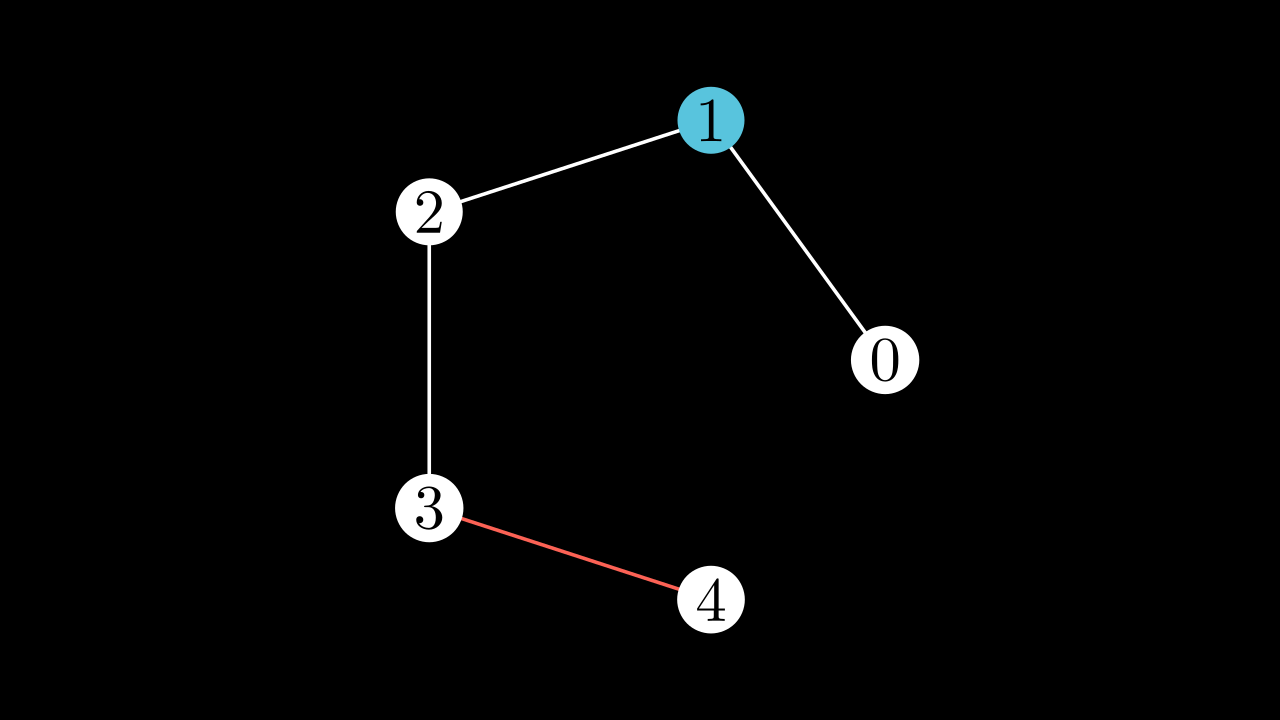

In [64]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):

        vertices = [i for i in range(5)]
        edges = [
            (0, 1),
            (1, 2),
            (3, 2),
            (3, 4),
        ]

        edge_config = {
            (3, 4): {"color": RED},
        }

        vertex_config = {
            1: {"color": BLUE},
        }

        g = Graph(
            vertices,
            edges,
            labels=True,
            layout="circular",
            edge_config=edge_config,
            vertex_config = vertex_config
        ).scale(1.4)
        self.add(g)

### Тренировка 🏋️
Напишем код для задания цепи из 20 узлов

In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [<ВАШ КОД>]
        edges = [<ВАШ КОД>]

        G = Graph(
            vertices,
            edges,
            layout = "spiral"
        )

        self.play(Create(G),FadeIn(Text("Случайная инициализация графа").to_edge(UP)))

        self.wait()

        self.play(G.animate.change_layout("circular"))
        self.wait()


Сколько узлов в дереве?

In [47]:
list(range(7))

[0, 1, 2, 3, 4, 5, 6]

Как задать ребра в дереве?


In [53]:
n = 3
vert = 2**(n-1) -1
edges = []
for i in range(vert):
    edges.extend([(i, 2*i +1),(i, 2*i +2)])
edges


[(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]

Нарисуем дерево глубины 4

In [ ]:

%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        n = 4
        vertices = <ВАШ КОД>
        edges = <ВАШ КОД>

        G = Graph(
            vertices,
            edges,
            layout = "tree",
            root_vertex=1
        )

        self.play(Create(G),FadeIn(Text("Дерево глубины 4").to_edge(UP)))


### Направленный граф

In [56]:
from manim import DiGraph

In [67]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5]

        edges = [(1, 2), (2, 3), (3, 4), (4, 5),(5,1)]

        G = DiGraph(vertices, edges, layout = 'circular')

        self.play(Create(G))

        self.wait()

### Тренировка 🏋️
Попробуйте layout `spring`,
 `spectral`,  `random`

In [74]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        layouts = ['spring','spectral'] +['random']*2
        vertices = list(range(10))

        edges = [(i,i+1) for i in vertices[:-1]]

        G = DiGraph(vertices, edges, layout = 'spiral')
        self.play(Create(G))

        # <ВАШ КОД>



`kamada-kawai` layout
Минимазация расстояния между соединеными вершинами

In [73]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5, 6, 7, 8]
        edges = [(1, 7), (1, 8), (2, 3), (2, 4), (2, 5),
                 (2, 8), (3, 4), (6, 1), (6, 2),
                 (6, 3), (7, 2), (7, 4)]


        G = DiGraph(vertices, edges, layout = 'circular')
        self.play(Create(G))

        self.play(G.animate.change_layout('kamada_kawai'))
        self.wait()

## Продвинутая работа с графиками

In [101]:
from manim import Axes, LogBase

### Логарифмическое основание

In [102]:
%%manim -qm -v WARNING ManimScene

class LogScalingExample(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 10, 1],
            y_range=[-2, 6, 1],
            tips=False,
            axis_config={"include_numbers": True},
            y_axis_config={"scaling": LogBase(custom_labels=True)},
        )

        # x_min must be > 0 because log is undefined at 0.
        graph = ax.plot(lambda x: x ** 2, x_range=[0.001, 10], use_smoothing=False)
        self.add(ax, graph)

### Пакет для физической анимации

## Домашнее задание 📝

- Поработайте с графами
    Например с двудольными графами
    Поработайте с библиотекой [networkx](https://networkx.org/)
Вы можете посмотреть на примеры анимации из https://slama.dev/manim/camera-and-graphs/
-

In [95]:
from manim import Flash, GREEN
import itertools

In [93]:
for cycle, color in zip(itertools.cycle((1,2,3)),['red','blue']*3):
    print(cycle,color)

1 red
2 blue
3 red
1 blue
2 red
3 blue


In [100]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        colors = [RED, BLUE, GREEN]*20
        vertices = [1, 2, 3, 4, 5]

        edges = [(1, 2), (2, 3), (3, 4), (4, 5),(5,1)]

        G = Graph(vertices, edges, layout = 'circular')

        self.play(Create(G))

        self.wait()

        for i,color in zip(itertools.cycle(vertices),colors):
            self.play(
                Flash(G.vertices[i], color=color, flash_radius=0.3),
                G.vertices[i].animate.set_color(color),
            )
